In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_val_column = train.isnull().sum()

In [4]:
missing_val_column[missing_val_column>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
housing= pd.concat([train, test], axis=0)

In [6]:
missing_val_column = housing.isnull().sum()
missing_val_column[missing_val_column>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

- ~MSZoning~           4
- LotFrontage      486
- Alley           2721
- ~Utilities~          2
- ~Exterior1st~        1
- ~Exterior2nd~        1
- ~MasVnrType~        24
- MasVnrArea        23
- ~KitchenQual~        1
- ~Functional~         2
- ~FireplaceQu~     1420

In [7]:
housing.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [8]:
housing['MSZoning']=housing.MSZoning.fillna('RL')

In [9]:
housing.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [10]:
housing.MSZoning.isnull().sum()

0

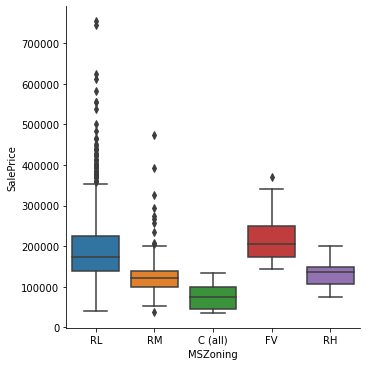

In [11]:
g= sns.catplot(x='MSZoning', y='SalePrice', data=housing, kind='box')

In [12]:
housing.LotFrontage.describe()
#수치형

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
housing.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Utilities의 경우 하나의 값으로 거의 통일됨 -> col 제거

In [14]:
housing.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

In [15]:
housing.Exterior1st=housing.Exterior1st.fillna('VinylSd')

In [16]:
housing.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [17]:
housing.Exterior2nd= housing.Exterior2nd.fillna('VinylSd')

In [18]:
housing.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [19]:
tmp = housing.copy()
tmp.MasVnrType=tmp.MasVnrType.fillna('NaN')

In [20]:
tmp.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

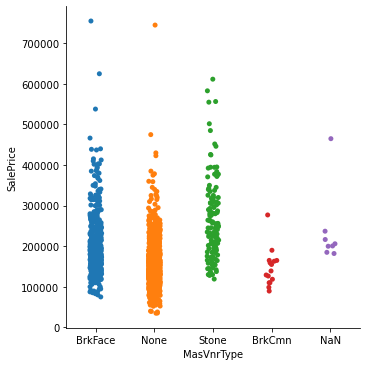

In [21]:
g= sns.catplot(x='MasVnrType', y='SalePrice', data=tmp)

In [40]:
housing.MasVnrType=housing.MasVnrType.fillna('None')

In [41]:
housing.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [24]:
housing.MasVnrArea.value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

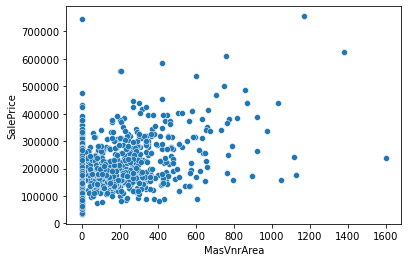

In [25]:
g= sns.scatterplot(x='MasVnrArea', y='SalePrice', data=housing)

In [26]:
housing.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [27]:
housing.KitchenQual=housing.KitchenQual.fillna('TA')

In [28]:
housing.KitchenQual.value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

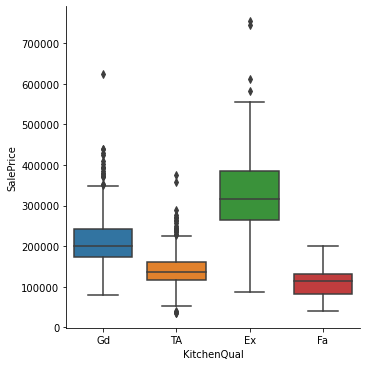

In [29]:
g=sns.catplot(x='KitchenQual', y='SalePrice', data=housing, kind='box')

In [30]:
housing.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [31]:
housing.Functional=housing.Functional.fillna('Typ')

In [32]:
housing.Functional.value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [33]:
housing.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [34]:
tmp=housing.copy()
tmp.FireplaceQu=tmp.FireplaceQu.fillna('NaN')

In [35]:
tmp.FireplaceQu.value_counts()

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

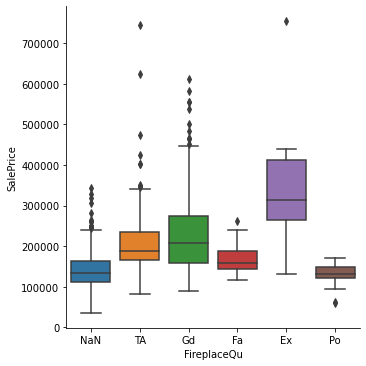

In [36]:
g= sns.catplot(x='FireplaceQu', y='SalePrice', data=housing, kind='box')

In [43]:
housing.FireplaceQu=housing.FireplaceQu.fillna('NaN')

In [37]:
tmp.Alley=tmp.Alley.fillna('NaN')
tmp.Alley.value_counts()

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

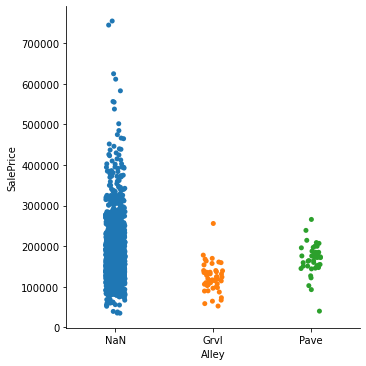

In [38]:
g= sns.catplot(x='Alley', y='SalePrice', data=tmp)

In [44]:
missing_val_column = housing.isnull().sum()
missing_val_column[missing_val_column>0]

LotFrontage      486
Alley           2721
Utilities          2
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

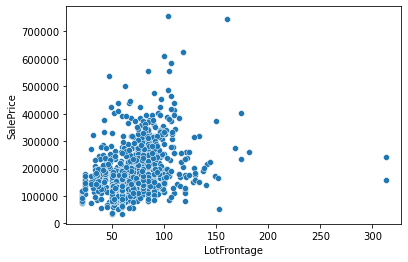

In [45]:
g= sns.scatterplot(x='LotFrontage', y='SalePrice', data=housing)